In [2]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
dataset_path="C:\\Users\\Mayuri\\OneDrive\\Desktop\\DL\\Brain_Tumor"2

In [4]:
img_width,img_height=150,150

In [5]:
datagen=ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'Training'),
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 2870 images belonging to 4 classes.


In [8]:
val_data=datagen.flow_from_directory(
    os.path.join(dataset_path,'Testing'),
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='categorical'
)

Found 394 images belonging to 4 classes.


In [9]:
model=Sequential([
    Conv2D(32,(2,2),activation='relu',input_shape=(img_width,img_height,3)),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(32,(2,2),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(4,activation='softmax')
])

C:\Users\Mayuri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
history=model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 414ms/step - accuracy: 0.9641 - loss: 0.0996 - val_accuracy: 0.7157 - val_loss: 3.1543
Epoch 2/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 409ms/step - accuracy: 0.9674 - loss: 0.0956 - val_accuracy: 0.7437 - val_loss: 3.0780
Epoch 3/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 406ms/step - accuracy: 0.9718 - loss: 0.0867 - val_accuracy: 0.7335 - val_loss: 3.6394
Epoch 4/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 406ms/step - accuracy: 0.9704 - loss: 0.0832 - val_accuracy: 0.7386 - val_loss: 3.3698
Epoch 5/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 38s 412ms/step - accuracy: 0.9796 - loss: 0.0598 - val_accuracy: 0.7437 - val_loss: 4.0142
Epoch 6/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 403ms/step - accuracy: 0.9797 - loss: 0.0597 - val_accuracy: 0.7513 - val_loss: 3.9513
Epoch 7/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 37s 403ms/step - accuracy: 0.9867 - loss: 0.0484 - val_accuracy: 0.7640 - val_loss: 4.7517
Epoch 8/20
90/90 ━━━━━━━━━━━━━━━━━━━━ 44s 478ms/step - accuracy: 0.9844 - loss: 0.0484 - val_accu

In [28]:
val_loss,val_acc=model.evaluate(val_data)
print("Validation_Loss:",val_loss)
print("Validation_Accuracy:",val_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.7244 - loss: 5.4961
Validation_Loss: 5.592872142791748
Validation_Accuracy: 0.7258883118629456


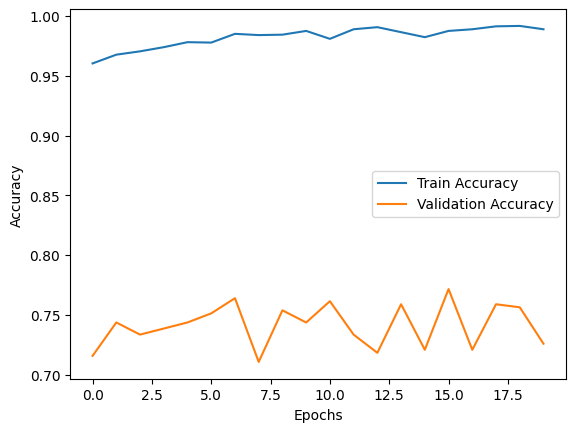

In [29]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

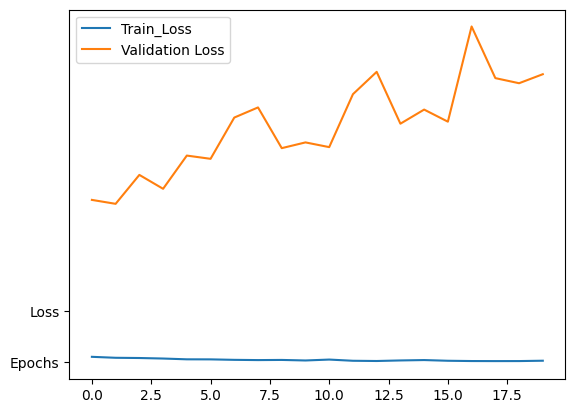

In [30]:
plt.plot(history.history['loss'],label='Train_Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.plot('Epochs')
plt.plot('Loss')
plt.legend()
plt.show()

In [31]:
def predict_image(img_path):
    img=load_img(img_path,target_size=(img_width,img_height))
    img_array=img_to_array(img)/255.0
    img_array=np.expand_dims(img_array,axis=0)
    prediction=model.predict(img_array)
    class_labels=['glioma_tumor', 'meningioma_tumor', 'pituitary_tumor', 'no_tumor']
    predicted_class = np.argmax(prediction, axis=1)[0]
    print(f"The model predicts: {class_labels[predicted_class]}")
    plt.imshow(img)
    plt.axis('off')
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
The model predicts: meningioma_tumor


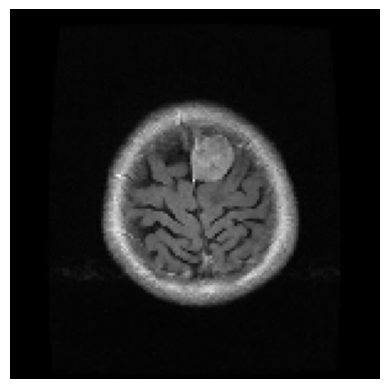

In [32]:
predict_image(r"C:\Users\Mayuri\OneDrive\Desktop\DL\Brain_Tumor\Training\meningioma_tumor\m (3).jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
The model predicts: glioma_tumor


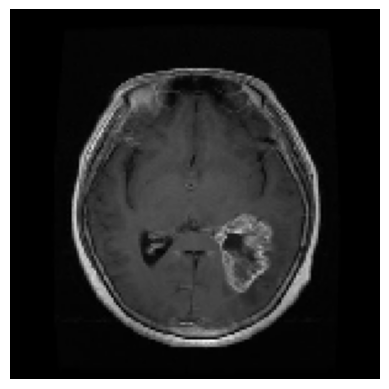

In [33]:
predict_image(r"C:\Users\Mayuri\OneDrive\Desktop\DL\Brain_Tumor\Training\glioma_tumor\gg (9).jpg")